# **Simulación del Modelo de Ising**
## Problema Obligatorio 2
### Física Computacional - 2025

---

**Autores:**
- Irene Blanco Ramos
- Luna González Silva
- Teresa González Silva

**Fecha:** 8 de mayo de 2025

---


### Temperatura 1.5 $K$, Configuración aleatoria

##### Coste computacional: evaluación del tiempo de ejecución en función de $N^2$

| Pasos Monte Carlo $100N^2$ | Ordenador Teresa (s) | Ordenador Irene (s) | Joel (s) |
|----------------------------|-----------------------|----------------------|----------|
| $100 \times 10^2 = 10000$  | 0.02                  | 0.01                 |     |
| $100 \times 20^2 = 40000$  | 0.07                  | 0.05                 |     |
| $100 \times 30^2 = 90000$  | 0.22                  | 0.14                 |      |
| $100 \times 40^2 = 160000$ | 0.47                  | 0.30                 |     |
| $100 \times 50^2 = 250000$ | 0.82                  | 0.60                |     |
| $100 \times 60^2 = 360000$ | 1.36                  | 1.09                 |      |
| $100 \times 70^2 = 490000$ | 2.0                   | 1.69                 |      |
| $100 \times 80^2 = 640000$ | 3.54                  | 2.40                 |     |
| $100 \times 90^2 = 810000$ | 5.19                  | 3.47                 |    |
| $100 \times 100^2 = 1000000$| 11.01                 | 4.98                |      |
| $100 \times 110^2 = 1210000$| 13.27                 | 6.58                 |      |
| $100 \times 120^2 = 1440000$| 18.07                 | 8.62                 |      |
| $100 \times 130^2 = 1690000$| 20.27                 | 11.01                 |    |
| $100 \times 140^2 = 1960000$| 24.28                 |  13.81                |    |
| $100 \times 150^2 = 2250000$| 33.10             |  17.42                |    |
| $100 \times 160^2 = 2560000$| 37.38              |  22.57              |    |
| $100 \times 170^2 = 2890000$| 45.42                 |  25.22               |    |
| $100 \times 180^2 = 3240000$| 56.40                 |  30.13              |    |
| $100 \times 190^2 = 3610000$| 69.55                 |  35.91               |    |
| $100 \times 200^2 = 4000000$| 80.64                 |  42.09               |    |

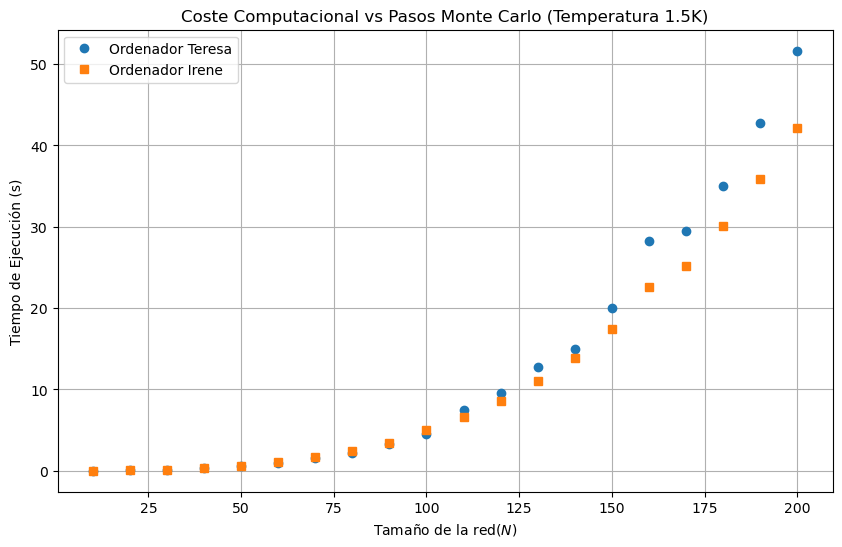

In [1]:
# Celda de Python para graficar el coste computacional

import matplotlib.pyplot as plt

# Datos de los pasos Monte Carlo y tiempos de ejecución
N = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
teresa_times = [0.02, 0.05,0.13, 0.36, 0.63, 0.94, 1.61, 2.25, 3.32, 4.57, 7.42, 9.59, 12.80, 14.92, 19.98, 28.26, 29.48, 35.06, 42.73, 51.65]
irene_times = [0.01, 0.05, 0.14, 0.30, 0.60, 1.09, 1.69, 2.40, 3.47, 4.98, 6.58, 8.62, 11.01, 13.81, 17.42, 22.57, 25.22, 30.13, 35.91, 42.09]
# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(N, teresa_times, label="Ordenador Teresa", marker='o', linestyle='')
plt.plot(N, irene_times, label="Ordenador Irene", marker='s', linestyle='')

# Configuración de la gráfica
plt.title("Coste Computacional vs Pasos Monte Carlo (Temperatura 1.5K)")
plt.xlabel("Tamaño de la red($N$)")
plt.ylabel("Tiempo de Ejecución (s)")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

Parámetro ajustado para la curva 1: 0.002155132145440786
Parámetro ajustado para la curva 2: 0.0016940362269307618


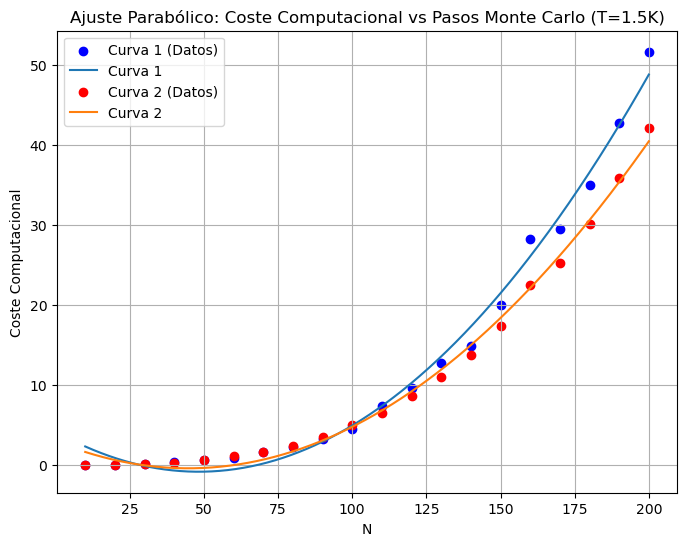

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos de ejemplo (reemplaza con tus datos reales)
N = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
coste_computacional_1 = teresa_times = [0.02, 0.05,0.13, 0.36, 0.63, 0.94, 1.61, 2.25, 3.32, 4.57, 7.42, 9.59, 12.80, 14.92, 19.98, 28.26, 29.48, 35.06, 42.73, 51.65]
coste_computacional_2 = [0.01, 0.05, 0.14, 0.30, 0.60, 1.09, 1.69, 2.40, 3.47, 4.98, 6.58, 8.62, 11.01, 13.81, 17.42, 22.57, 25.22, 30.13, 35.91, 42.09]
# Define una función modelo para el ajuste (parábola: y = ax^2 + bx + c)
def modelo_parabolico(x, a, b,c):
    return a * x**2 +b*x +c

# Ajuste de la primera curva
params_1, _ = curve_fit(modelo_parabolico, N, coste_computacional_1)
a1, b1,c1= params_1
print(f"Parámetro ajustado para la curva 1: {a1}")

# Ajuste de la segunda curva
params_2, _ = curve_fit(modelo_parabolico, N, coste_computacional_2)
a2,b2,c2= params_2 

# Generar valores ajustados
x_fit = np.linspace(min(N), max(N), 500)
y_fit_1 = modelo_parabolico(x_fit, a1,b1,c1)
y_fit_2 = modelo_parabolico(x_fit, a2,b2,c2)
print(f"Parámetro ajustado para la curva 2: {a2}")

# Graficar los datos y los ajustes
plt.figure(figsize=(8, 6))
plt.scatter(N, coste_computacional_1, label="Curva 1 (Datos)", color="blue")
plt.plot(x_fit, y_fit_1, label=f"Curva 1")

plt.scatter(N, coste_computacional_2, label="Curva 2 (Datos)", color="red")
plt.plot(x_fit, y_fit_2, label=f"Curva 2")

plt.xlabel("N")
plt.ylabel("Coste Computacional")
plt.title("Ajuste Parabólico: Coste Computacional vs Pasos Monte Carlo (T=1.5K)")
plt.legend()
plt.grid()
plt.show()

### Temperatura 2 $K$, Configuración aleatoria

### Temperatura critica , Configuración aleatoria

### Temperatura 3 $K$, Configuración ordenada

##### Coste computacional: evaluación del tiempo de ejecución en función de $N^2$

| Pasos Monte Carlo $100N^2$ | Ordenador Teresa (s) | Ordenador Irene (s) | Joel (s) |
|----------------------------|-----------------------|----------------------|----------|
| $100 \times 10^2 = 10000$  | 0.01                 |  0.01                |     |
| $100 \times 20^2 = 40000$  | 0.03                 |  0.04                |     |
| $100 \times 30^2 = 90000$  | 0.06                  |  0.10               |      |
| $100 \times 40^2 = 160000$ | 0.07                 |  0.18               |     |
| $100 \times 50^2 = 250000$ | 0.11                  |  0.26                |     |
| $100 \times 60^2 = 360000$ | 0.21                 |  0.41                |      |
| $100 \times 70^2 = 490000$ | 0.30                  | 0.59                |      |
| $100 \times 80^2 = 640000$ | 0.44                 |  0.77               |     |
| $100 \times 90^2 = 810000$ | 0.64                  |  1.13              |     |
| $100 \times 100^2 = 1000000$| 0.85                |  1.34              |      |
| $100 \times 110^2 = 1210000$| 1.01                |  1.74               |      |
| $100 \times 120^2 = 1440000$| 1.31                 |  2.01               |      |
| $100 \times 130^2 = 1690000$| 1.68                 |  2.72               |    |
| $100 \times 140^2 = 1960000$| 1.98                |  3.10                |    |
| $100 \times 150^2 = 2250000$| 2.55                 |  3.40                |    |
| $100 \times 160^2 = 2560000$| 3.09                 |  4.31              |    |
| $100 \times 170^2 = 2890000$| 3.71                 |  5.20               |    |
| $100 \times 180^2 = 3240000$| 4.33                 |  5.67              |    |
| $100 \times 190^2 = 3610000$| 5.09                 |  6.81               |    |
| $100 \times 200^2 = 4000000$| 6.38                 |  7.67               |    |

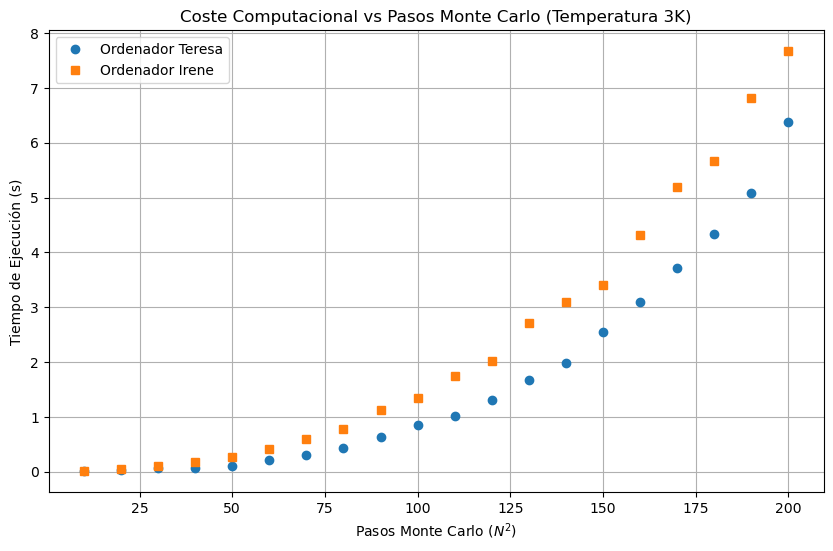

In [3]:
# Celda de Python para graficar el coste computacional a 3K

import matplotlib.pyplot as plt

# Datos de los pasos Monte Carlo y tiempos de ejecución para 3K
N_squared = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
teresa_times = [0.01, 0.03, 0.06, 0.07, 0.11, 0.21, 0.30, 0.44, 0.64, 0.85, 1.01, 1.31, 1.68, 1.98, 2.55, 3.09, 3.71, 4.33, 5.09, 6.38]
irene_times = [0.01, 0.04, 0.10, 0.18, 0.26, 0.41, 0.59, 0.77, 1.13, 1.34, 1.74, 2.01, 2.72, 3.10, 3.40, 4.31, 5.20, 5.67, 6.81, 7.67]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(N_squared, teresa_times, label="Ordenador Teresa", marker='o',linestyle='')
plt.plot(N_squared, irene_times, label="Ordenador Irene", marker='s',linestyle='')

# Configuración de la gráfica
plt.title("Coste Computacional vs Pasos Monte Carlo (Temperatura 3K)")
plt.xlabel("Pasos Monte Carlo ($N^2$)")
plt.ylabel("Tiempo de Ejecución (s)")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

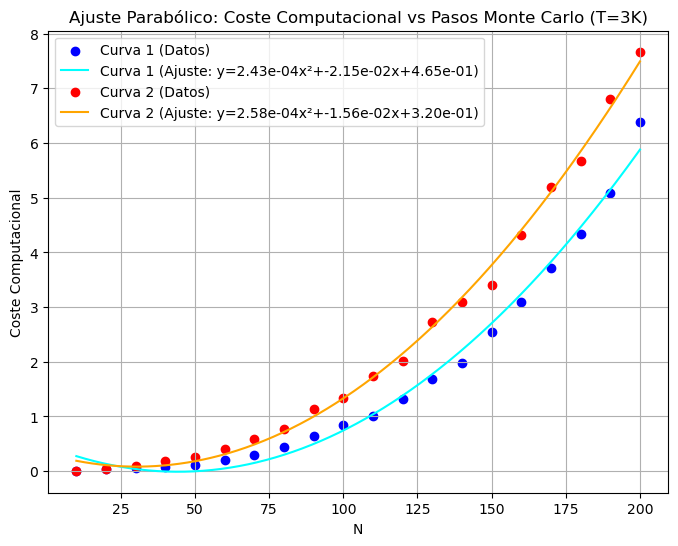

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos de ejemplo (reemplaza con tus datos reales)
N = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
coste_computacional_1 = [0.01, 0.03, 0.06, 0.07, 0.11, 0.21, 0.30, 0.44, 0.64, 0.85, 1.01, 1.31, 1.68, 1.98, 2.55, 3.09, 3.71, 4.33, 5.09, 6.38]
coste_computacional_2 = [0.01, 0.04, 0.10, 0.18, 0.26, 0.41, 0.59, 0.77, 1.13, 1.34, 1.74, 2.01, 2.72, 3.10, 3.40, 4.31, 5.20, 5.67, 6.81, 7.67]
# Define una función modelo para el ajuste (parábola: y = ax^2 + bx + c)
def modelo_parabolico(x, a, b, c):
    return a * x**2 + b * x + c

# Ajuste de la primera curva
params_1, _ = curve_fit(modelo_parabolico, N, coste_computacional_1)
a1, b1, c1 = params_1

# Ajuste de la segunda curva
params_2, _ = curve_fit(modelo_parabolico, N, coste_computacional_2)
a2, b2, c2 = params_2

# Generar valores ajustados
x_fit = np.linspace(min(N), max(N), 500)
y_fit_1 = modelo_parabolico(x_fit, a1, b1, c1)
y_fit_2 = modelo_parabolico(x_fit, a2, b2, c2)

# Graficar los datos y los ajustes
plt.figure(figsize=(8, 6))
plt.scatter(N, coste_computacional_1, label="Curva 1 (Datos)", color="blue")
plt.plot(x_fit, y_fit_1, label=f"Curva 1 (Ajuste: y={a1:.2e}x²+{b1:.2e}x+{c1:.2e})", color="cyan")

plt.scatter(N, coste_computacional_2, label="Curva 2 (Datos)", color="red")
plt.plot(x_fit, y_fit_2, label=f"Curva 2 (Ajuste: y={a2:.2e}x²+{b2:.2e}x+{c2:.2e})", color="orange")

plt.xlabel("N")
plt.ylabel("Coste Computacional")
plt.title("Ajuste Parabólico: Coste Computacional vs Pasos Monte Carlo (T=3K)")
plt.legend()
plt.grid()
plt.show()
plt.show()